<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keys" data-toc-modified-id="Keys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keys</a></span></li><li><span><a href="#Preparing-dataframes-according-to-mutation-type" data-toc-modified-id="Preparing-dataframes-according-to-mutation-type-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing dataframes according to mutation type</a></span></li><li><span><a href="#Cleaning-structural-mutations-data" data-toc-modified-id="Cleaning-structural-mutations-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning structural mutations data</a></span><ul class="toc-item"><li><span><a href="#Function---Combining-all-V6-fragments-per-mutation" data-toc-modified-id="Function---Combining-all-V6-fragments-per-mutation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Function - Combining all V6 fragments per mutation</a></span></li><li><span><a href="#Function---Distance-between-fragments" data-toc-modified-id="Function---Distance-between-fragments-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Function - Distance between fragments</a></span></li><li><span><a href="#Function---Combining-fragments-based-on-distance" data-toc-modified-id="Function---Combining-fragments-based-on-distance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Function - Combining fragments based on distance</a></span></li></ul></li><li><span><a href="#Functions---Finding-the-effect-of-structural-mutations-on-expression" data-toc-modified-id="Functions---Finding-the-effect-of-structural-mutations-on-expression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions - Finding the effect of structural mutations on expression</a></span><ul class="toc-item"><li><span><a href="#Getting-information-on-DEGs" data-toc-modified-id="Getting-information-on-DEGs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Getting information on DEGs</a></span></li><li><span><a href="#Functions---Isolating-genes-in-structural-mutations" data-toc-modified-id="Functions---Isolating-genes-in-structural-mutations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Functions - Isolating genes in structural mutations</a></span></li><li><span><a href="#Finding-DEGs-within-structural-mutations" data-toc-modified-id="Finding-DEGs-within-structural-mutations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Finding DEGs within structural mutations</a></span></li></ul></li><li><span><a href="#Analysis---Finding-the-effect-of-structural-mutations-on-expression" data-toc-modified-id="Analysis---Finding-the-effect-of-structural-mutations-on-expression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis - Finding the effect of structural mutations on expression</a></span><ul class="toc-item"><li><span><a href="#Singular-structural-mutations" data-toc-modified-id="Singular-structural-mutations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Singular structural mutations</a></span><ul class="toc-item"><li><span><a href="#Genes-in-structural-mutations" data-toc-modified-id="Genes-in-structural-mutations-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Genes in structural mutations</a></span></li><li><span><a href="#DEGs-in-structural-mutations" data-toc-modified-id="DEGs-in-structural-mutations-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>DEGs in structural mutations</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Assigning-expression-change-and-raw-counts-to-each-gene-in-a-Structural-Mutation" data-toc-modified-id="Assigning-expression-change-and-raw-counts-to-each-gene-in-a-Structural-Mutation-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Assigning expression change and raw counts to each gene in a Structural Mutation</a></span></li><li><span><a href="#Distribution-of-expression-change-across-structural-mutation-types" data-toc-modified-id="Distribution-of-expression-change-across-structural-mutation-types-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Distribution of expression change across structural mutation types</a></span></li><li><span><a href="#Correlation-between-the-number-of-structural-mutations-and-DEGs-per-MAline" data-toc-modified-id="Correlation-between-the-number-of-structural-mutations-and-DEGs-per-MAline-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Correlation between the number of structural mutations and DEGs per MAline</a></span></li></ul></li></ul></li><li><span><a href="#Permutations-test---Simulated-DEGs-within/overlapping-structural-mutations" data-toc-modified-id="Permutations-test---Simulated-DEGs-within/overlapping-structural-mutations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Permutations test - Simulated DEGs within/overlapping structural mutations</a></span></li></ul></div>

# Keys

In [1]:
import json
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import iqr
stats.junk = lambda chisq, df: stats.chi2.sf(chisq, df)
import csv
import gffpandas.gffpandas as gffpd
import scikit_posthocs as sp
import itertools
from itertools import combinations
import pandas as pd
import numpy as np
import os
from sklearn import linear_model
import statsmodels.stats.multicomp
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#### Names of MA lines ####
CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

#### Dataframe recording the generation time per sample ####
dic_gen = {}
generation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/Mutation_Fitness.txt', delimiter = '\t')
generation['Sample'] = generation['Sample'].str.replace('_', '-L')
generation = generation.loc[generation['Sample'].isin(CC2344 + CC2931)]

for i in generation.index.values:
    dic_gen[generation.at[i,'Sample']] = generation.at[i, 'Generation']
generations = pd.Series(dic_gen)

#### Dataframe recording the mutation count per sample ####
all_mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
dic_mut = {maline:all_mutations.loc[all_mutations['sample'] == maline].count()[0] for maline in all_mutations['sample'].values.tolist()}
mutations = pd.Series(dic_mut)

# Preparing dataframes according to mutation type

In [2]:
#### Deletions ####
df_del = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/s_deletions.bed', sep='\t', comment='#', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'extra1', 'strand']
df_del.columns = header
df_del[['sample', 'type', 'old_chrom', 'old_chrom_no', 'old_chromStart', 'old_chromEnd']] = df_del.name.str.split('_', expand = True)
df_del = df_del.drop(columns = ['name'])
df_del['old_chrom'] = df_del['old_chrom'] + '_' + df_del['old_chrom_no']
df_del = df_del.drop(columns = ['old_chrom_no'])

#### Duplications ####
df_dup = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/s_duplications.bed', sep='\t', comment='#', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'extra1', 'strand']
df_dup.columns = header[:len(df_dup.columns)]
df_dup[['sample', 'type', 'old_chrom', 'old_chrom_no', 'old_chromStart', 'old_chromEnd']] = df_dup.name.str.split('_', expand = True)
df_dup = df_dup.drop(columns = ['name'])
df_dup['old_chrom'] = df_dup['old_chrom'] + '_' + df_dup['old_chrom_no']
df_dup = df_dup.drop(columns = ['old_chrom_no'])

#### Excisions ####
df_ex = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/s_excisions.bed', sep='\t', comment='#', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'extra1', 'strand']
df_ex.columns = header[:len(df_ex.columns)]
df_ex[['sample', 'type', 'TE1', 'TE2','old_chrom', 'old_chrom_no', 'old_chromStart', 'old_chromEnd', 'direction']] = df_ex.name.str.split('_', expand = True)
df_ex = df_ex.drop(columns = ['name'])
df_ex['transposable_elements'] = df_ex['TE1'] + '_' + df_ex['TE2']
df_ex['old_chrom'] = df_ex['old_chrom'] + '_' + df_ex['old_chrom_no']
df_ex = df_ex.drop(columns = ['old_chrom_no', 'TE1', 'TE2'])

#### Insertions ####
df_ins = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/s_insertions.bed', sep='\t', comment='#', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'extra1', 'strand']
df_ins.columns = header[:len(df_ins.columns)]
df_ins[['sample', 'type', 'TE1', 'TE2','old_chrom', 'old_chrom_no', 'old_chromStart']] = df_ins.name.str.split('_', expand = True)
df_ins = df_ins.drop(columns = ['name'])
df_ins['transposable_elements'] = df_ins['TE1'] + '_' + df_ins['TE2']
df_ins['old_chrom'] = df_ins['old_chrom'] + '_' + df_ins['old_chrom_no']
df_ins = df_ins.drop(columns = ['old_chrom_no', 'TE1', 'TE2'])

#### Inversions ####
df_inv = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/s_inversions.bed', sep='\t', comment='#', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'extra1', 'strand']
df_inv.columns = header[:len(df_inv.columns)]
df_inv[['sample', 'type', 'old_chrom', 'old_chrom_no', 'old_chromStart', 'old_chromEnd', 'direction']] = df_inv.name.str.split('_', expand = True)
df_inv = df_inv.drop(columns = ['name'])
df_inv['old_chrom'] = df_inv['old_chrom'] + '_' + df_inv['old_chrom_no']
df_inv = df_inv.drop(columns = ['old_chrom_no'])

#### Translocations ####
df_trans = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/s_translocations.bed', sep='\t', comment='#', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'extra1', 'strand']
df_trans.columns = header[:len(df_trans.columns)]
df_trans[['sample', 'type', 'old_chrom', 'old_chrom_no', 'old_chromStart']] = df_trans.name.str.split('_', expand = True)
df_trans = df_trans.drop(columns = ['name'])
df_trans['old_chrom'] = df_trans['old_chrom'] + '_' + df_trans['old_chrom_no']
df_trans = df_trans.drop(columns = ['old_chrom_no'])

# Cleaning structural mutations data

## Function - Combining all V6 fragments per mutation

In [114]:
def cleanSM(df):
    """ When the structural mutations in V5 were lifted onto V6, mutations that 
    spanned several base pairs in V5 were often split into fragments in V6. This code 
    provides the entire range of the structural mutation. Please note that mutations that were 
    initially found in chromosomes 1, 6 and 10 may be found in either chromosome (1, 6, 10) in
    the lifted over file """
    
    new_df = pd.DataFrame(columns = df.columns.values.tolist())
    for chrom in df['chrom'].unique():
        chrom_section = df.loc[(df['chrom'] == chrom) & (df['old_chrom'] == chrom)]
        if chrom in ['chromosome_01', 'chromosome_06', 'chromosome_10']:
            chrom_section2 = df.loc[(df['chrom'] == chrom) & (df['old_chrom'].isin(['chromosome_01', 'chromosome_06', 'chromosome_10']))]
            chrom_section = pd.concat([chrom_section, chrom_section2], axis = 0)
            chrom_section = chrom_section.drop_duplicates()
        for sample in chrom_section['sample'].unique():
            sample_section = chrom_section.loc[chrom_section['sample'] == sample]
            for a in sample_section['old_chromStart'].unique():
                old_start = sample_section.loc[sample_section['old_chromStart'] == a]
                if len(old_start) == 1:
                    new_df = pd.concat([new_df, old_start], axis = 0)

                else:
                    chromStart = min(old_start['chromStart'])
                    chromEnd = max(old_start['chromEnd'])
                    temporary = old_start.loc[[list(old_start.index.values)[0]]]
                    temporary['chromStart'] = chromStart
                    temporary['chromEnd'] = chromEnd
                    new_df = pd.concat([new_df, temporary], axis = 0)
    new_df = new_df.drop_duplicates()
    return new_df

In [115]:
######################################
#### Running the function cleanSM ####
######################################
new_df_del = cleanSM(df_del)
new_df_del.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_deletions.csv', sep = '\t', header = True)

new_df_dup = cleanSM(df_dup)
new_df_dup.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_duplications.csv', sep = '\t', header = True)

new_df_ex = cleanSM(df_ex)
new_df_ex.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_excisions.csv', sep = '\t', header = True)

new_df_ins = cleanSM(df_ins)
new_df_ins.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_insertions.csv', sep = '\t', header = True)

new_df_inv = cleanSM(df_inv)
new_df_inv.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_inversions.csv', sep = '\t', header = True)

new_df_trans = cleanSM(df_trans)
new_df_trans.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_translocations.csv', sep = '\t', header = True)

## Function - Distance between fragments

In [3]:
def distance_fragments(df):
    distance = []
    for i in df['chrom'].unique():
        chrom_section = df.loc[(df['chrom'] == i) & (df['old_chrom'] == i)]
        if i in ['chromosome_01', 'chromosome_06', 'chromosome_10']: ## The chromosomal location of SM were interchangeable 
            chrom_section2 = df.loc[(df['chrom'] == i) & (df['old_chrom'].isin(['chromosome_01', 'chromosome_06', 'chromosome_10']))]
            chrom_section = pd.concat([chrom_section, chrom_section2], axis = 0)
            chrom_section = chrom_section.drop_duplicates()
        for sample in chrom_section['sample'].unique():
            sample_section = chrom_section.loc[chrom_section['sample'] == sample]
            for a in sample_section['old_chromStart'].unique():
                old_start = sample_section.loc[sample_section['old_chromStart'] == a]
                for strand in old_start['strand'].unique():
                    section1 = old_start.loc[old_start['strand'] == strand].sort_values(by = ['chromStart'])
                    arr_start = section1['chromStart'].values.tolist()
                    arr_end = section1['chromEnd'].values.tolist()
                    try:
                        p = 0
                        while p <= len(arr_start) - 1:
                            start = arr_start[p]
                            end = arr_end[p]
                            start_2 = arr_start[p+1]
                            end_2 = arr_end[p+1]
                            distance.append(start_2 - end)
                            p += 1
                            if p == len(arr_start) - 1:
                                break
                    except: continue
    return distance

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Distribution of distances between fragmented structural mutations')

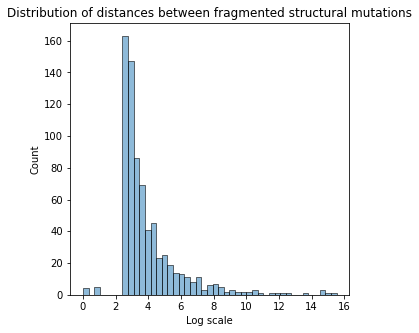

In [5]:
list_distance = []
for i in [df_del, df_ins, df_trans, df_inv, df_dup, df_ex]:
    list_distance += distance_fragments(i)
# the -4 distance are two insertions that occurred in the same site

a = pd.DataFrame(list_distance)
plt.figure(figsize = (5,5))
display(sns.histplot(np.log(a + 1), legend = False))
plt.xlabel('Log scale')
plt.title('Distribution of distances between fragmented structural mutations')
# Mean distance is 25699

## Function - Combining fragments based on distance

In [95]:
def cleanSM_by_distance(df, distance_from_frag):
    """ This code combines fragments that are a set distance away from each other. 
    That way you can better ascertain the location of the structural mutation when 
    the fragments span a larger distance."""
    
    new_df = pd.DataFrame(columns = df.columns.values.tolist())
    distance = distance_from_frag
    for i in df['chrom'].unique():
        chrom_section = df.loc[(df['chrom'] == i) & (df['old_chrom'] == i)]
        if i in ['chromosome_01', 'chromosome_06', 'chromosome_10']: ## The chromosomal location of SM were interchangeable 
            chrom_section2 = df.loc[(df['chrom'] == i) & (df['old_chrom'].isin(['chromosome_01', 'chromosome_06', 'chromosome_10']))]
            chrom_section = pd.concat([chrom_section, chrom_section2], axis = 0)
            chrom_section = chrom_section.drop_duplicates()
        for sample in chrom_section['sample'].unique():
            sample_section = chrom_section.loc[chrom_section['sample'] == sample]
            for a in sample_section['old_chromStart'].unique():
                old_start = sample_section.loc[sample_section['old_chromStart'] == a].sort_values(by = ['chromStart'])

                new_arr_start = []
                new_arr_end = []
                if len(old_start) == 1:
                    new_df = pd.concat([new_df, old_start], axis = 0)
                else:
                    arr_start = old_start['chromStart'].values.tolist()
                    arr_end = old_start['chromEnd'].values.tolist()

                    p = 0
                    while p <= len(arr_start) - 1:
                        start = arr_start[p]
                        end = arr_end[p]
                        start_2 = arr_start[p+1]
                        end_2 = arr_end[p+1]

                        if (start_2 - end) > distance:
                            new_arr_start.append(start)
                            new_arr_end.append(end)
                            p += 1
                            if p >= len(arr_start) - 1:
                                new_arr_start.append(start_2)
                                new_arr_end.append(end_2)
                                break
                        else:
                            new_arr_start.append(start)
                            new_arr_end.append(end_2)
                            p += 1
                            if p >= len(arr_start) - 1:
                                break

                    if len(new_arr_start) <= 2:
                        temp = old_start[0:len(new_arr_start)]
                        temp['chromStart'] = new_arr_start
                        temp['chromEnd'] = new_arr_end
                        new_df = pd.concat([new_df, temp], axis = 0)
                        break

                    else:
                        q = 0
                        while q <= len(arr_start):
                            q += 1
                            z = 0
                            while z < len(new_arr_start) - 1:
                                start = new_arr_start[z]
                                end = new_arr_end[z]
                                start_2 = new_arr_start[z+1]
                                end_2 = new_arr_end[z+1]

                                if start_2 - end > distance:
                                    z += 1
                                else:
                                    new_arr_start.remove(start_2)
                                    new_arr_end.remove(end)
                                    z += 1
                temp = old_start[0:len(new_arr_start)]
                temp['chromStart'] = new_arr_start
                temp['chromEnd'] = new_arr_end
                new_df = pd.concat([new_df, temp], axis = 0)
    new_df = new_df.drop_duplicates()
    return new_df

In [196]:
##################################################
#### Running the function cleanSM_by_distance ####
##################################################

for i in [25699]:
    new_df_del = cleanSM_by_distance(df_del, i)
    new_df_del.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_deletions.csv', sep = '\t', header = True)

    new_df_dup = cleanSM_by_distance(df_dup, i)
    new_df_dup.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_duplications.csv', sep = '\t', header = True)

    new_df_ex = cleanSM_by_distance(df_ex, i)
    new_df_ex.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_excisions.csv', sep = '\t', header = True)

    new_df_ins = cleanSM_by_distance(df_ins, i)
    new_df_ins.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_insertions.csv', sep = '\t', header = True)

    new_df_inv = cleanSM_by_distance(df_inv, i)
    new_df_inv.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_inversions.csv', sep = '\t', header = True)

    new_df_trans = cleanSM_by_distance(df_trans, i)
    new_df_trans.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_translocations.csv', sep = '\t', header = True)

<ipython-input-95-fb61d15c46e9>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['chromStart'] = new_arr_start
<ipython-input-95-fb61d15c46e9>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['chromEnd'] = new_arr_end
<ipython-input-95-fb61d15c46e9>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

# Functions - Finding the effect of structural mutations on expression

## Getting information on DEGs

In [2]:
CC2931_l2f = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')
CC2931_l2f = CC2931_l2f.drop(['CC2931-ANC'], axis = 1)

#### List of samples with known structural mutations ####
CC2931 = ["CC2931-L1", 'CC2931-L2', "CC2931-L6", 'CC2931-L9',"CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

#### Differentially expressed genes ####
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')
DEGs = DEGs.reset_index()
DEGs = pd.melt(DEGs, id_vars = 'index', value_vars = DEGs.columns[1:])
DEGs = DEGs.dropna().drop(columns = ['index'])
DEGs = DEGs.rename(columns = {'variable':'sample'})
    
DEGs = DEGs.loc[DEGs['sample'].isin(CC2931)]

#### Assigning the expression change to each DEG ####
for i in list(DEGs.index.values):
    if 'CC2931' in DEGs.at[i, 'sample']:
        DEGs.at[i, 'L2F'] = CC2931_l2f.at[DEGs.at[i, 'value'], DEGs.at[i, 'sample']]

## Functions - Isolating genes in structural mutations

In [3]:
def genes_overlapping_SM(df):
    """ This code identifies the name of genes overlapped by structural mutations. """
    
    ## File provides the location of the genes in the reference version 6 genome ##
    annotation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
    annotation = annotation.replace(r'^\s*$', np.nan, regex=True)
    
    df['genename'] = 'intergenic'
    df = df.drop(columns = ['index'])

    #### Extracting genenames of overlapping or within structural mutations ####
    for idx in df.index.values:
        chrom = annotation.loc[(annotation['seq_id'] == df.at[idx, 'chrom']) & (annotation['strand'] == df.at[idx, 'strand'])]
        end_SM_in_gene = chrom.loc[(chrom['start'] <= df.at[idx, 'chromEnd']) & (chrom['end'] >= df.at[idx, 'chromEnd'])] ## finding the genes at the end of the SM
        start_SM_in_gene = chrom.loc[(chrom['start'] <= df.at[idx, 'chromStart']) & (chrom['end'] >= df.at[idx, 'chromStart'])]
        SM_within_gene = chrom.loc[(chrom['start'] <= df.at[idx, 'chromStart']) & (chrom['end'] >= df.at[idx, 'chromEnd'])]
        genes_in_SM = chrom.loc[(df.at[idx, 'chromStart'] <= chrom['start']) & (chrom['end'] <= df.at[idx, 'chromEnd'])]
        chrom = pd.concat([end_SM_in_gene, start_SM_in_gene, SM_within_gene, genes_in_SM], axis = 0).drop_duplicates()
        if len(chrom) != 0:
            df.at[idx, 'genename'] = list(np.unique(chrom['attributes'])) ## Adding the name of the gene(s) that the structural mutation overlap with
    return df

## Finding DEGs within structural mutations

In [4]:
def DEGs_in_SM(df, DEGs):
    """ This code identifies DEGs within structural mutations. """
    
    df = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/locations_of_SMs.csv', delimiter = '\t')
    df = df.drop(columns = 'Unnamed: 0')

    for i in df.index.values:
        if df.at[i, 'genename'] != 'intergenic':
            df.at[i, 'genename'] = pd.eval(df.at[i, 'genename'])

    df['degs_in_sm'] = np.nan
    df['genes_in_sm'] = np.nan
    df['perc_degs_in_sm'] = np.nan

    #### Number of degs in structural mutations ####
    for maline in df['sample'].unique():
        sample_DEGs = DEGs.loc[DEGs['sample'] == maline]
        sample_SM = df.loc[(df['sample'] == maline) & (df['genename'] != 'intergenic')]
        for idx in sample_SM.index.values:
            genes = sample_SM.loc[idx, 'genename']
            if genes != 'intergenic':
                df.at[idx, 'genes_in_sm'] = len(genes)
            try:
                degs = sample_DEGs.loc[sample_DEGs['value'].isin(genes)]
                df.at[idx, 'degs_in_sm'] = len(degs)
                df.at[idx, 'perc_degs_in_sm'] = len(degs)/df.at[idx, 'genes_in_sm']
            except:
                continue
    return df

# Analysis - Finding the effect of structural mutations on expression

## Singular structural mutations

### Genes in structural mutations

In [5]:
## Opening files with structural mutations categorized by the mutation type ##
df_inv = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_inversions.csv', delimiter = '\t')
df_del = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_deletions.csv', delimiter = '\t')
df_dup = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_duplications.csv', delimiter = '\t')
df_trans = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_translocations.csv', delimiter = '\t')
df_ex = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_excisions.csv', delimiter = '\t')
df_ins = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/cleaned_by_distance_insertions.csv', delimiter = '\t')

## Combining structural mutations into a single dataframe ##
df = pd.concat([df_del, df_dup, df_ex, df_ins, df_inv, df_trans], axis = 0).drop(columns = ['Unnamed: 0']).reset_index()
df['sample'] = df['sample'].replace('L', 'CC2931-L', regex = True)
df = genes_overlapping_SM(df)
df.to_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/locations_of_SMs.csv', sep = '\t', header = True, index = True)

### DEGs in structural mutations

In [6]:
df = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/locations_of_SMs.csv', delimiter = '\t')
df = df.drop(columns = 'Unnamed: 0')
df = DEGs_in_SM(df, DEGs)

### Analysis

deletion = 12405.066666666668
deletion = 21986.172084376343
duplication = 16226.518518518518
duplication = 21051.66337509084
excision = 8.833333333333334
excision = 6.58206118262089
insertion = 263.3813559322034
insertion = 1523.4780266774726
inversion = 1504.357142857143
inversion = 3104.256125613122
translocation = 10.0
translocation = 1.8708286933869707
deletion    0.5555555555555556
duplication    0.40229885057471265
excision    0.3333333333333333
insertion    0.3695652173913043
inversion    0.5
translocation    0.2
all     0.391304347826087
CC2931-L14    0.36666666666666664
CC2931-L15    0.6190476190476191
CC2931-L1    0.2727272727272727
CC2931-L2    0.45161290322580644
CC2931-L9    0.21428571428571427
CC2931-L6    0.5
CC2931-L11    0.4
CC2931-L13    0.32


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

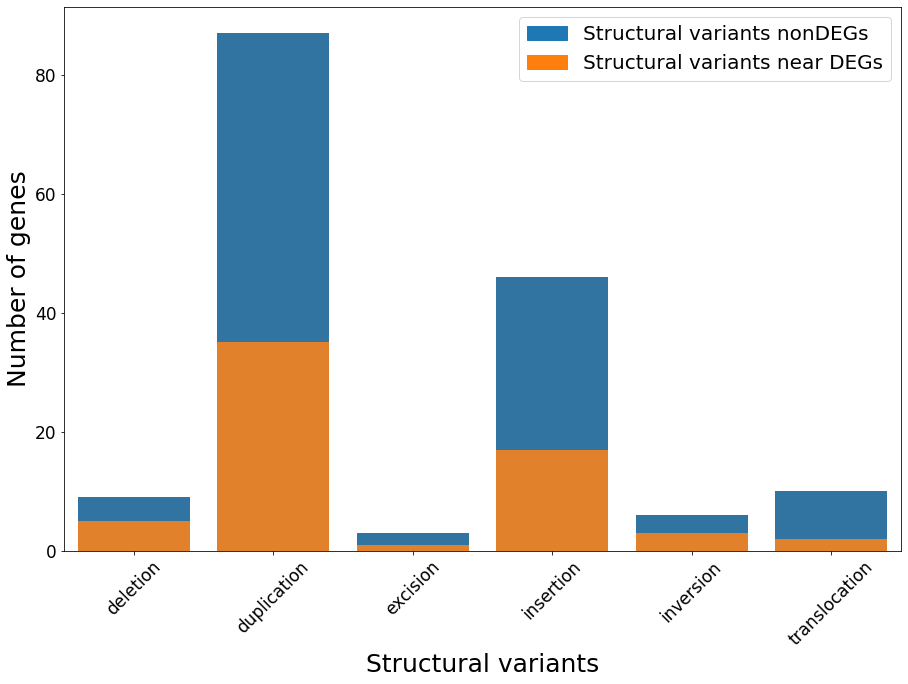

In [7]:
#### Length of structural mutations ####
df['length_sm (bps)'] = df['chromEnd'] - df['chromStart'] 
for i in df['type'].unique():
    print(i + ' = ' + str(df.loc[df['type'] == i]['length_sm (bps)'].mean()))
    print(i + ' = ' + str(df.loc[df['type'] == i]['length_sm (bps)'].std()))

df2 = df.copy()
df2['genename'] = df2['genename'].astype(str)
df2 = df2.drop_duplicates(subset = ['genename', 'sample', 'type'])

#### Percent of structural mutations that are DEGs ####
for i in df2['type'].unique():
    print(i + '    ' + str(df2.loc[df2['type'] == i]['degs_in_sm'].sum()/df2.loc[(df2['type'] == i)]['genes_in_sm'].sum()))
    
print('all' + '     ' + str(df2['degs_in_sm'].sum()/df2['genes_in_sm'].sum()))

#### Percent of structural mutations that are DEGs per MA line ####
for i in df2['sample'].unique():
    print(i + '    ' + str(df2.loc[df2['sample'] == i]['degs_in_sm'].sum()/df2.loc[df2['sample'] == i]['genes_in_sm'].sum()))

#### Graph ####
import matplotlib.patches as mpatches 
prop_DEGs_nearSM = pd.DataFrame()

for i in df2.type.unique():
    prop_DEGs_nearSM.at[i, 'no.genes'] = df2.loc[(df2['type'] == i)]['genes_in_sm'].sum()
    prop_DEGs_nearSM.at[i, 'no.degs.in.sm'] = df2.loc[df2['type'] == i]['degs_in_sm'].sum()
    
prop_DEGs_nearSM = prop_DEGs_nearSM.reset_index().rename(columns={'index': 'type'})

plt.figure(figsize = (15,10))
bar1 = sns.barplot(x = "type",  y = "no.genes", data = prop_DEGs_nearSM, color = sns.color_palette()[0])
bar2 = sns.barplot(x = "type",  y = "no.degs.in.sm", data = prop_DEGs_nearSM, color = sns.color_palette()[1])
a = mpatches.Patch(color = sns.color_palette()[0], label = 'Structural variants nonDEGs') 
b = mpatches.Patch(color = sns.color_palette()[1], label = 'Structural variants near DEGs') 
plt.legend(handles=[a, b], fontsize = 20) 
plt.xlabel('Structural variants', fontsize = 25)
plt.ylabel('Number of genes', fontsize = 25)
plt.xticks(rotation = 45, fontsize = 17)
plt.yticks(fontsize = 17)
# plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/SM_distribution.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')

### Assigning expression change and raw counts to each gene in a Structural Mutation

In [10]:
CC2931_l2f = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')
CC2931_rawcounts = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_deseq_filtered_normalized.txt', delimiter = '\t', index_col = 'Unnamed: 0')

for maline in CC2931:
    CC2931_rawcounts[maline + '_avg'] = CC2931_rawcounts[[maline + '-rep1', maline + '-rep2', maline + '-rep3']].mean(axis = 1)
    
df = df.explode('genename').reset_index().drop(columns = ['index']) ### expanding genes within a structural mutation into separate rows
df['L2F'] = np.nan
df['raw_counts'] = np.nan
df['expression_change'] = 'no_change'

for idx in df.index.values:
    try:
        l2f = CC2931_l2f.loc[df.at[idx, 'genename'], df.at[idx, 'sample']]
        counts = CC2931_rawcounts.loc[df.at[idx, 'genename'], df.at[idx, 'sample'] + '_avg']
        df.at[idx, 'L2F'] = l2f
        df.at[idx, 'raw_counts'] = counts
        if l2f > 0:
            df.at[idx, 'expression_change'] = 'up_regulated'
        if l2f < 0:
            df.at[idx, 'expression_change'] = 'down_regulated'
    except: continue

### Distribution of expression change across structural mutation types

deletion   upregulated : 1  downregulated : 8  nochange : 0
duplication   upregulated : 68  downregulated : 15  nochange : 4
excision   upregulated : 2  downregulated : 1  nochange : 0
insertion   upregulated : 22  downregulated : 23  nochange : 1
inversion   upregulated : 3  downregulated : 3  nochange : 0
translocation   upregulated : 5  downregulated : 5  nochange : 0


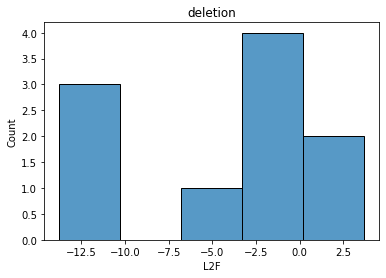

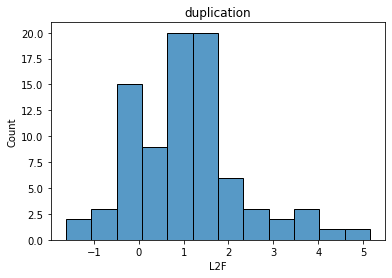

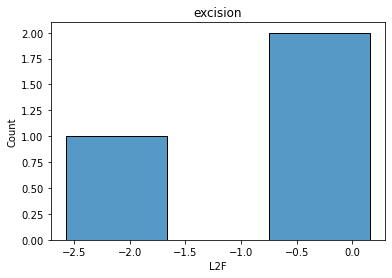

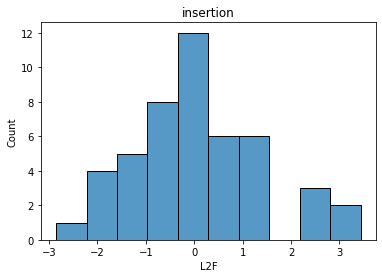

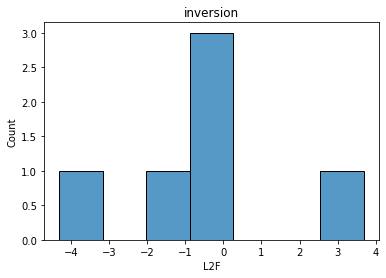

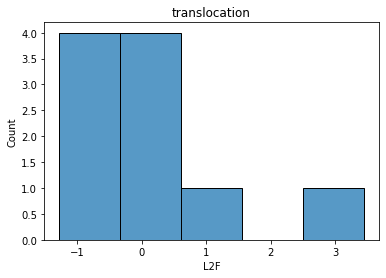

In [15]:
#### Distribution of the expression change of genes overlapped by structural mutations ####
df = df.loc[df['genename'] != 'intergenic']
for sm in df['type'].unique():
    upregulated = 0
    downregulated = 0
    nochange = 0
    section = df.loc[df['type'] == sm]
    plt.figure()
    plt.title(sm)
    sns.histplot(section['L2F'])
#     print(sm + '  ' + str(section['L2F'].mean()))
    for maline in section['sample'].unique():
        section1 = section.loc[section['sample'] == maline]
        for gene in section1['genename'].unique():
            a = section1.loc[section1['genename'] == gene]['expression_change'].values[0]
            if a == 'up_regulated':
                upregulated += 1
            if a == 'down_regulated':
                downregulated += 1
            if a == 'no_change':
                nochange += 1
    print(sm + '   ' + "upregulated : " + str(upregulated) + '  ' + 'downregulated : ' + str(downregulated) + '  ' + 'nochange : ' + str(nochange))

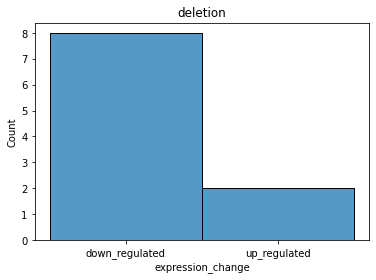

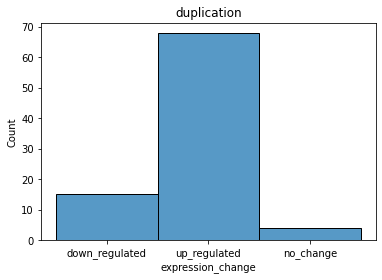

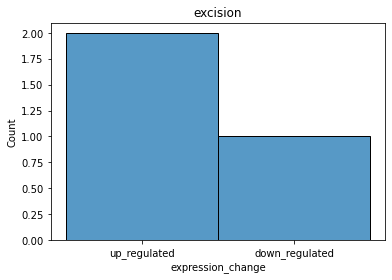

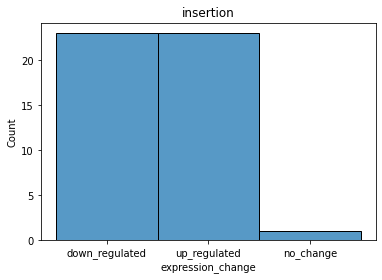

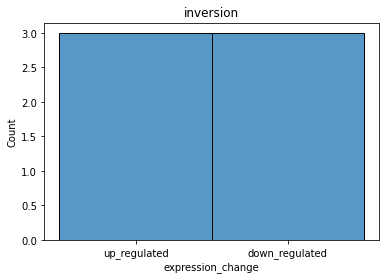

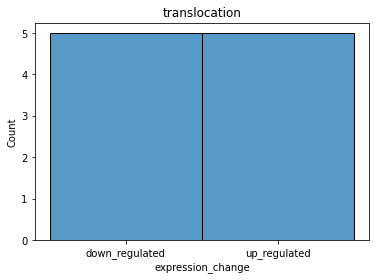

In [15]:
for i in df.type.unique():
    plt.figure()
    plt.title(i)
    sns.histplot(df.loc[df['type'] == i]['expression_change'])

### Correlation between the number of structural mutations and DEGs per MAline

PearsonRResult(statistic=-0.45967422560113574, pvalue=0.2518262072409676)

<AxesSubplot:>

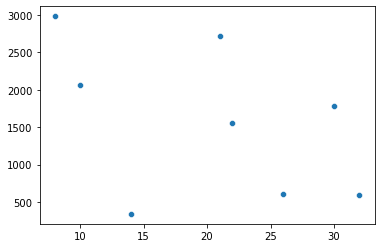

In [30]:
#### Correlation of genes in structural mutations vs DEGs ####
SM = []
degs = []
for sample in df['sample'].unique():
    SM.append(len(df.loc[df['sample'] == sample]))
    degs.append(len(DEGs.loc[DEGs['sample'] == sample]['value'].unique()))
display(scipy.stats.pearsonr(SM, degs))
sns.scatterplot(x = SM, y = degs)

# Permutations test - Simulated DEGs within/overlapping structural mutations 

In [213]:
#### List of samples with known structural mutations ####
CC2931 = ["CC2931-L1", 'CC2931-L2', "CC2931-L6", 'CC2931-L9',"CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

## File provides the location of the genes in the reference version 6 genome ##
annotation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/annotation/v6_genes.csv', delimiter = '\t')
annotation = annotation.replace(r'^\s*$', np.nan, regex=True)

permutations = pd.DataFrame(columns = CC2931)
for trials in range(1000):
    ## Preparing simulated DEGs ##
    simulated_DEGs = {}
    for sample in CC2931:
        no_degs = len(DEGs.loc[DEGs['sample'] == sample])
        simulated_DEGs[sample] = list(random.choices(annotation['attributes'].values.tolist(), k = no_degs))

    simulated_DEGs = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in simulated_DEGs.items()]))
    simulated_DEGs = simulated_DEGs.reset_index()
    simulated_DEGs = pd.melt(simulated_DEGs, id_vars = 'index', value_vars = simulated_DEGs.columns[1:])
    simulated_DEGs = simulated_DEGs.dropna().drop(columns = ['index'])
    simulated_DEGs = simulated_DEGs.rename(columns = {'variable':'sample'})

    df1 = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/structural_mutations/locations_of_SMs.csv', delimiter = '\t')
    df1 = df1.drop(columns = 'Unnamed: 0')
    df1 = DEGs_in_SM(df1, simulated_DEGs)
    df1['genename'] = df1['genename'].astype(str)
    df1 = df1.drop_duplicates(subset = ['genename', 'sample', 'type']) ## removes multiple sm's in the same gene
    for i in df1['sample'].unique():
        permutations.at[trials, i] = df1.loc[df1['sample'] == i]['degs_in_sm'].sum()/df1.loc[df1['sample'] == i]['genes_in_sm'].sum()

permutations.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/simulatedDEGsinSM.csv', sep = '\t', header = True, index = True)

In [218]:
permutations

,CC2931-L1,CC2931-L2,CC2931-L6,CC2931-L9,CC2931-L11,CC2931-L13,CC2931-L14,CC2931-L15
0,0.136364,0.129032,0.25,0.0,0.1,0.08,0.133333,0.238095
1,0.090909,0.129032,0.375,0.0,0.1,0.08,0.1,0.190476
2,0.272727,0.032258,0.625,0.0,0.1,0.04,0.233333,0.095238
3,0.045455,0.0,0.25,0.071429,0.1,0.16,0.1,0.047619
4,0.0,0.0,0.125,0.071429,0.0,0.0,0.133333,0.047619
...,...,...,...,...,...,...,...,...
995,0.181818,0.0,0.25,0.0,0.0,0.0,0.066667,0.095238
996,0.0,0.064516,0.5,0.0,0.3,0.04,0.066667,0.238095
997,0.136364,0.032258,0.0,0.0,0.0,0.12,0.1,0.190476
998,0.181818,0.0,0.0,0.0,0.1,0.16,0.066667,0.047619


In [217]:
#### P value ####
for i in df2['sample'].unique():
    observed = df2.loc[df2['sample'] == i]['degs_in_sm'].sum()/df2.loc[df2['sample'] == i]['genes_in_sm'].sum()
    print(i + '     ' + str(len(permutations.loc[permutations[i] < observed])/1000))

CC2931-L14     0.998
CC2931-L15     1.0
CC2931-L1     0.975
CC2931-L2     1.0
CC2931-L9     0.998
CC2931-L6     0.939
CC2931-L11     0.967
CC2931-L13     0.999
